# Amazon Reviews Sentiment Analysis using NLTK
---
by Irem Arici

March 2024

## Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

from ipywidgets import widgets, FloatProgress

import nltk

In [7]:
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


## Data

In [8]:
df = pd.read_csv("Reviews.csv")

In [9]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
df["Text"].values[0]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.'

In [11]:
print(df.shape) # around half million reviews

(568454, 10)


In [12]:
df = df.head(1000) #downscaling the values

## Visualizing reviews

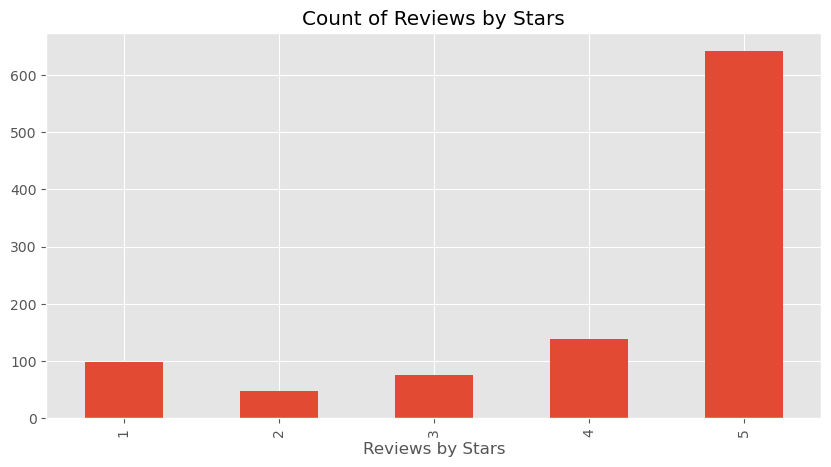

In [13]:
ax = df["Score"].value_counts().sort_index().plot(
        kind= "bar",
        title= "Count of Reviews by Stars",
        figsize= (10,5))

ax.set_xlabel("Reviews by Stars")

plt.show()

## VADER Sentiment Scoring
---
"bag of words" approach
 - stop words removed

In [14]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/iremarici/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

sia = SentimentIntensityAnalyzer()

In [16]:
# Run polarity score on the entire dataset

res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    text = row["Text"]
    myid = row["Id"]
    res[myid] = sia.polarity_scores(text)

100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 1507.36it/s]


In [17]:
# Create a dataset from new polarity score dictionary 

vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {"index" : "Id"})
vaders = vaders.merge(df, how = "left")

In [18]:
# Sentiment scores alongside the original dataframe of reviews

vaders.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Plotting VADER results

/var/folders/c2/jf3vrykn32d76fpp0jft_ndw0000gn/T/ipykernel_96059/3265048693.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(vaders, x = "Score", y = "compound", palette = "magma")


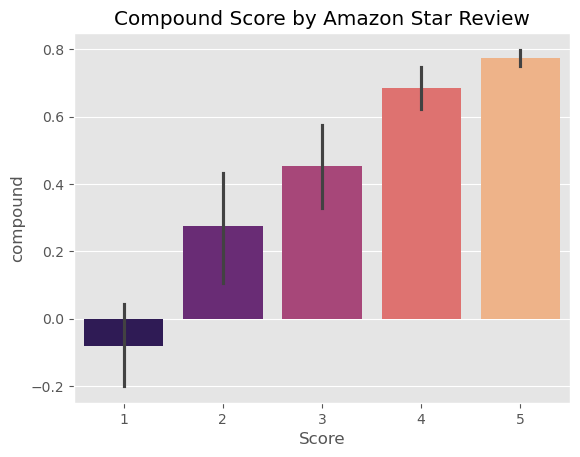

In [19]:
ax = sns.barplot(vaders, x = "Score", y = "compound", palette = "magma")
ax.set_title("Compound Score by Amazon Star Review")
plt.show()

/var/folders/c2/jf3vrykn32d76fpp0jft_ndw0000gn/T/ipykernel_96059/447261167.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(vaders, x = "Score", y = "pos", ax = axes[0], palette = "magma")
/var/folders/c2/jf3vrykn32d76fpp0jft_ndw0000gn/T/ipykernel_96059/447261167.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(vaders, x = "Score", y = "neu", ax = axes[1], palette = "magma")
/var/folders/c2/jf3vrykn32d76fpp0jft_ndw0000gn/T/ipykernel_96059/447261167.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(vaders, x = "Score", y = "neg", ax =

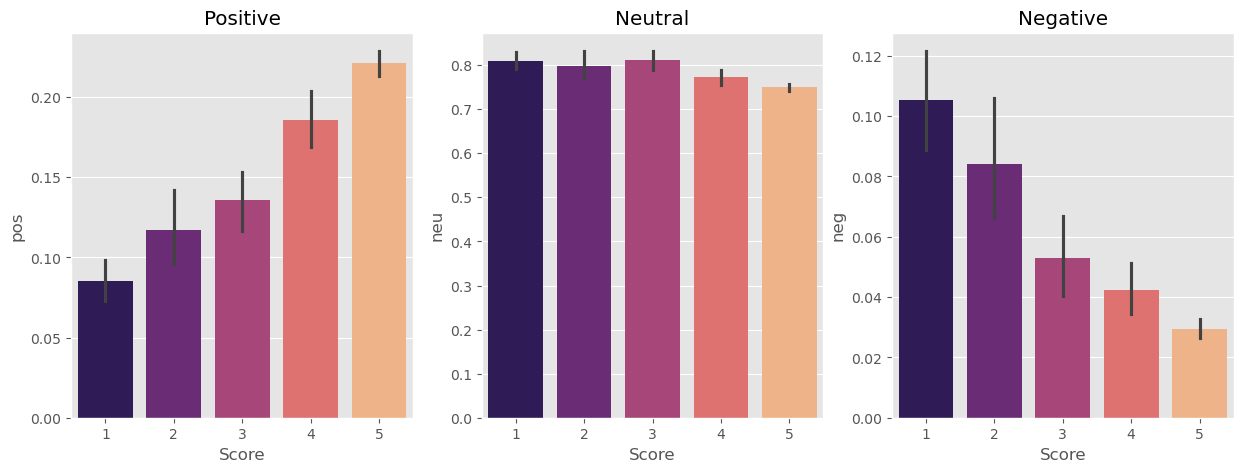

In [20]:
# See different subcategories of sentiments in a plot

fig, axes = plt.subplots(1, 3, figsize= (15,5))

sns.barplot(vaders, x = "Score", y = "pos", ax = axes[0], palette = "magma")
sns.barplot(vaders, x = "Score", y = "neu", ax = axes[1], palette = "magma")
sns.barplot(vaders, x = "Score", y = "neg", ax = axes[2], palette = "magma")

axes[0].set_title("Positive")
axes[1].set_title("Neutral")
axes[2].set_title("Negative")

plt.show()

## Roberta Pretrained Model
---
 - using a model trained with a large corpus of data
 - transformer model

In [21]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax

In [22]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

## Running Roberta model on dataset



In [23]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors="pt")
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    
    scores_dict = {
        "roberta_neg" : scores[0],
        "roberta_neu" : scores[1],
        "roberta_pos" : scores[2]
    }
    
    return scores_dict

In [29]:
res = {}
for i, row in tqdm(df.iterrows(), total = len(df)):
    try:
        text = row["Text"]
        myid = row["Id"]
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value

        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}

        res[myid] = both
    except RuntimeErro
        print(f"Broke for id {myid}")

  8%|███▍                                     | 84/1000 [00:10<01:24, 10.89it/s]

Broke for id 83


 19%|███████▌                                | 188/1000 [00:22<01:21,  9.99it/s]

Broke for id 187


 53%|█████████████████████▏                  | 530/1000 [01:08<00:59,  7.91it/s]

Broke for id 529


 54%|█████████████████████▋                  | 541/1000 [01:09<00:42, 10.80it/s]

Broke for id 540


 74%|█████████████████████████████▊          | 745/1000 [01:38<00:46,  5.52it/s]

Broke for id 746


 86%|██████████████████████████████████▌     | 864/1000 [01:54<00:14,  9.13it/s]

Broke for id 863


100%|███████████████████████████████████████| 1000/1000 [02:13<00:00,  7.47it/s]


In [33]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns = {"index" : "Id"})
results_df = results_df.merge(df, how = "left")

## Compare scores between models

In [35]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

/Users/iremarici/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


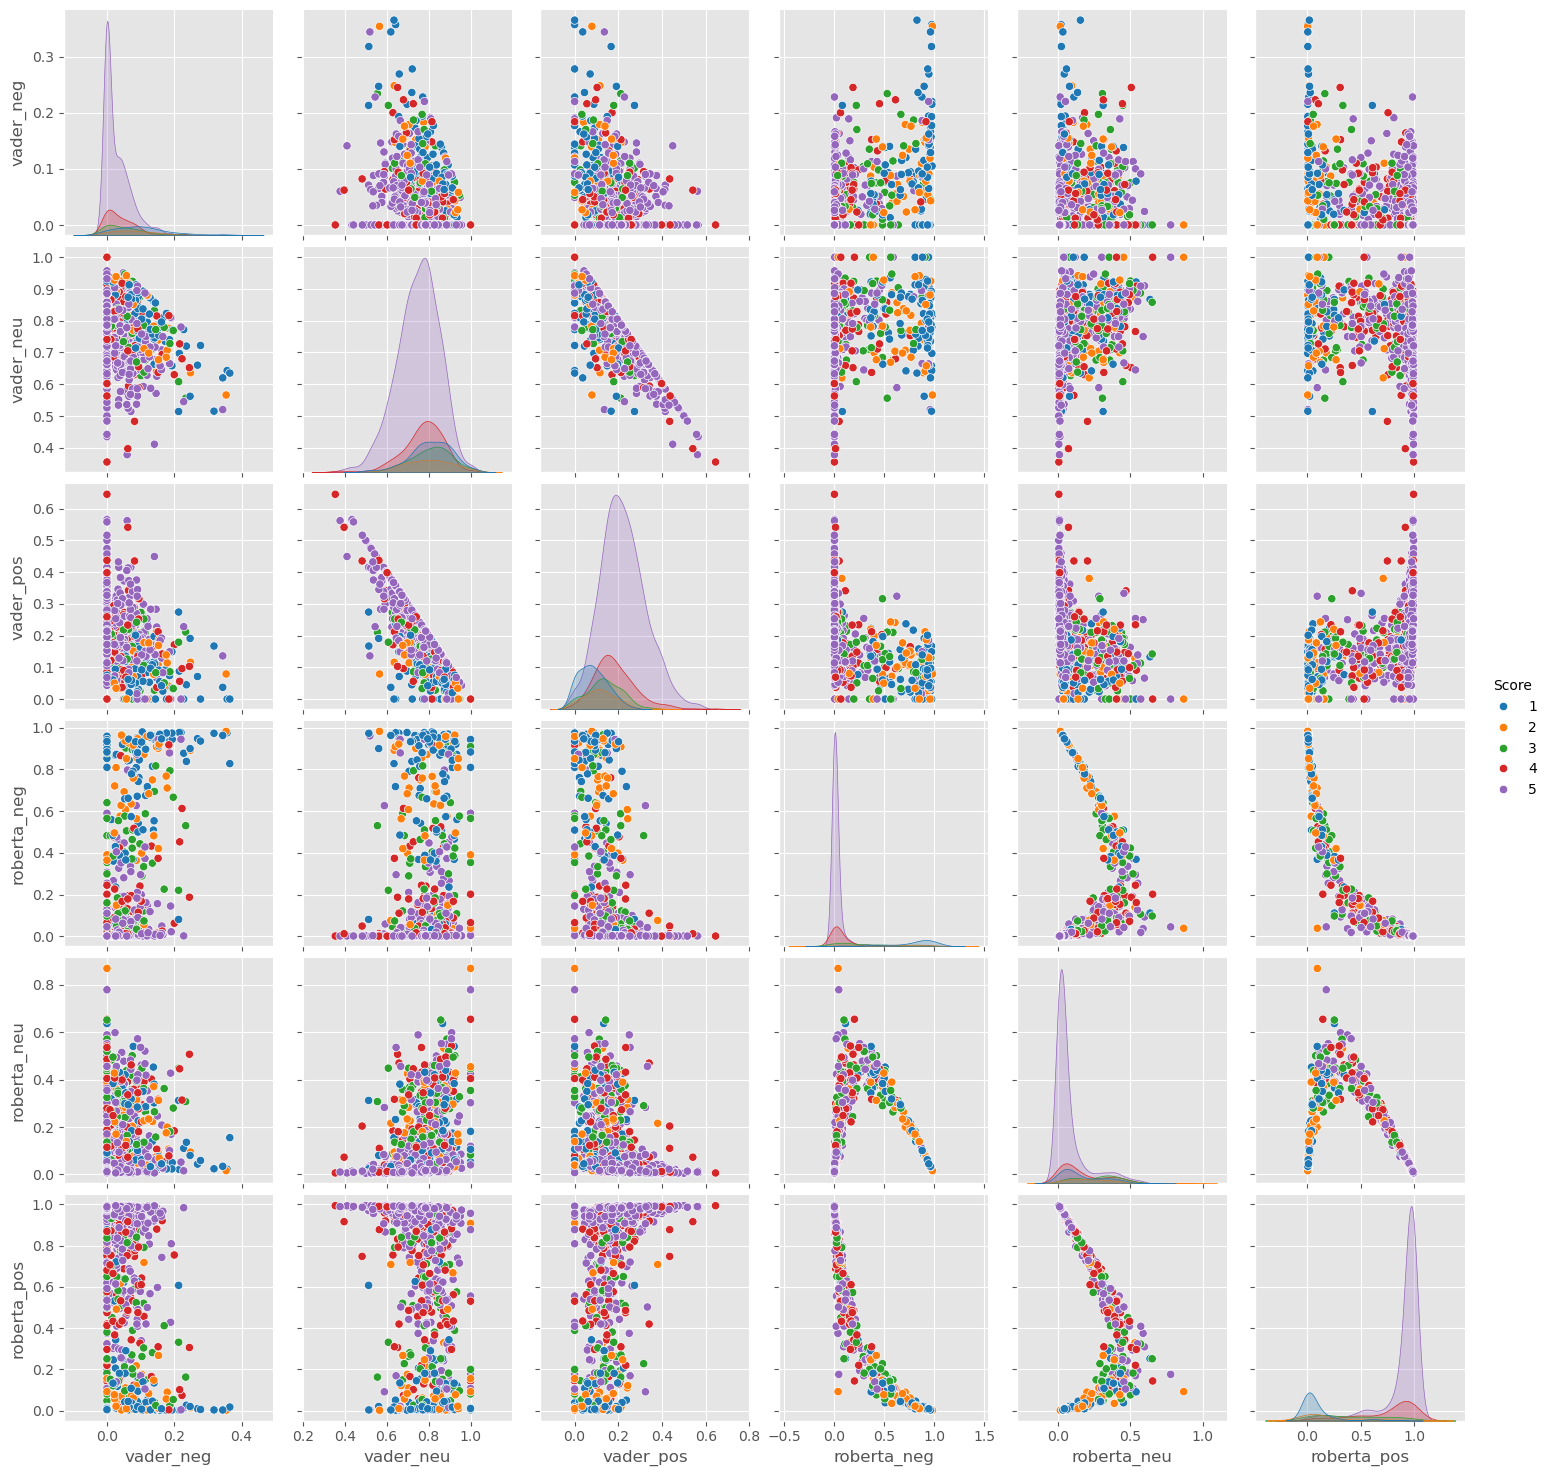

In [38]:
sns.pairplot(results_df, 
             vars = ['vader_neg', 'vader_neu', 'vader_pos',
                    'roberta_neg', 'roberta_neu', 'roberta_pos'],
             hue = "Score",
             palette= "tab10")
plt.show()

## Reviewing Examples

### Positive sentiment 5-star reviews

In [41]:
results_df.query("Score == 1").sort_values("roberta_pos", ascending=False)["Text"].values[3]

"To me, these are nothing like the regular Altoids and are not breath mints. They are pleasant-tasting little candies in a cute convenient tin, and that's as far as it goes. The mintiness is just not strong, and the wintergreens are definitely weaker than the peppermint minis. I'm not a dragon-breath person, but still, one of these mints is too small to have any effect on my breath. Four or five will freshen my breath for a short while - maybe 15 minutes. At this point, I think the Icebreakers Frost mints are the best as sugar free breath mints."

In [43]:
results_df.query("Score == 1").sort_values("vader_pos", ascending=False)["Text"].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

### Negative sentiment 5-star reviews

In [44]:
results_df.query("Score == 5").sort_values("roberta_neg", ascending=False)["Text"].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [45]:
results_df.query("Score == 5").sort_values("vader_neg", ascending=False)["Text"].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'